In [26]:
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
import xgboost as xgb

from datetime import timedelta
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib
%matplotlib inline

In [2]:
os.chdir('../')

In [3]:
df_train = pd.read_csv('./data/processed/train.csv', sep = ';', decimal=',')

In [4]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,date
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-08
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-08
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-08
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,2017-01-08
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,2017-01-08


In [5]:
center_id = 55
meal_id = 1993

condition1 = df_train['center_id'] == center_id
condition2 = df_train['meal_id'] == meal_id

In [6]:
df_train_processed = df_train[condition1 & condition2]

In [7]:
df_train_processed.date = pd.date_range('2017-01-01', periods=len(df_train_processed), freq='W')

C:\Users\SMARTI25\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
df_train_processed['day'] = df_train_processed.date.dt.day
df_train_processed['month'] = df_train_processed.date.dt.month
df_train_processed['year'] = df_train_processed.date.dt.year
df_train_processed['quarter'] = df_train_processed.date.dt.quarter

C:\Users\SMARTI25\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SMARTI25\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SMARTI25\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [9]:
df_train_processed.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,date,day,month,year,quarter
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-01,1,1,2017,1
2923,1035555,2,55,1993,133.89,133.89,0,0,121,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-08,8,1,2017,1
5819,1282652,3,55,1993,134.86,133.86,0,0,258,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-15,15,1,2017,1
8718,1066744,4,55,1993,134.89,133.89,0,0,82,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-22,22,1,2017,1
11607,1115779,5,55,1993,147.50,145.50,0,0,81,647,56,TYPE_C,2.0,Beverages,Thai,2017-01-29,29,1,2017,1


In [10]:
df_train_processed = df_train_processed.drop(columns=['id', 'center_id', 'meal_id', 'center_type', 'category', 'cuisine'])

In [11]:
df_train_processed = df_train_processed.set_index('date')

In [12]:
df_train_processed.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,day,month,year,quarter
date,,,,,,,,,,,,,
2017-01-01,1,136.83,135.83,0,0,270,647,56,2.0,1,1,2017,1
2017-01-08,2,133.89,133.89,0,0,121,647,56,2.0,8,1,2017,1
2017-01-15,3,134.86,133.86,0,0,258,647,56,2.0,15,1,2017,1
2017-01-22,4,134.89,133.89,0,0,82,647,56,2.0,22,1,2017,1
2017-01-29,5,147.50,145.50,0,0,81,647,56,2.0,29,1,2017,1


In [13]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2017-01-01 to 2019-10-06
Data columns (total 13 columns):
week                     145 non-null int64
checkout_price           145 non-null float64
base_price               145 non-null float64
emailer_for_promotion    145 non-null int64
homepage_featured        145 non-null int64
num_orders               145 non-null int64
city_code                145 non-null int64
region_code              145 non-null int64
op_area                  145 non-null float64
day                      145 non-null int64
month                    145 non-null int64
year                     145 non-null int64
quarter                  145 non-null int64
dtypes: float64(3), int64(10)
memory usage: 15.9 KB


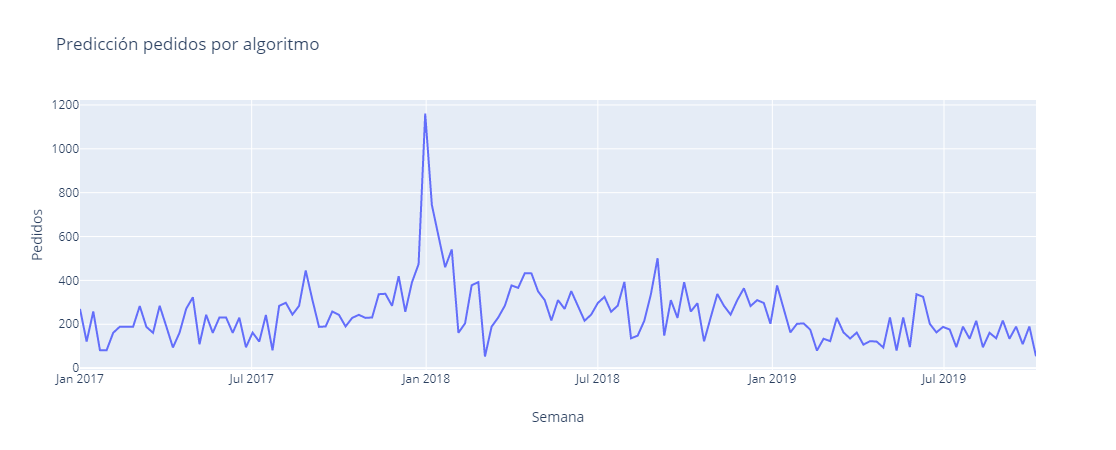

In [20]:
df_plot = df_train_processed.groupby(df_train_processed.index).agg({'num_orders' : 'sum'})

charts = [
	go.Scatter(
		x = df_plot.index,
		y = df_plot.num_orders,
		name = 'Train'
	)
]

fig = go.Figure(
	data = charts,
	layout = go.Layout(
		title = 'Predicción pedidos por algoritmo',
		xaxis_title = 'Semana',
		yaxis_title = 'Pedidos'
	)
)

fig

In [14]:
import statsmodels.api as sm

In [29]:
descomposition = sm.tsa.seasonal_decompose(df_plot, model='additive')

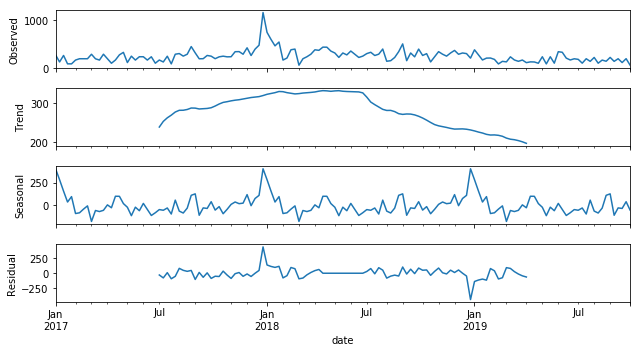

In [30]:
fig = descomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]